# Python Assignment - Working With Events

In this question, you are given 4 text files. 
These files contain timestamps, which correspond to the times of some 'events'. 

Your first task is to find out how many events are present in each file.

Consider only those events which have a positive value for timestamp


10000
12000
15000
9000


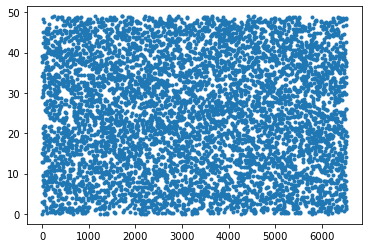

In [10]:
#your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def createPosArr(path):
    with open(path,'r') as f:
        lines=f.read().split(',') #split each data element

    posDataPoints=[0]
    print(len(lines))
    for i in range(0,len(lines)):
        if (float(lines[i])>0) :
            posDataPoints.append(float(lines[i]))

    return posDataPoints
    
    
    
#C:\krittika project
path1=os.path.join('c:'+os.sep,'krittika project','event_Q1.txt')
path2=os.path.join('c:'+os.sep,'krittika project','event_Q2.txt')
path3=os.path.join('c:'+os.sep,'krittika project','event_Q3.txt')
path4=os.path.join('c:'+os.sep,'krittika project','event_Q4.txt')


PosDataPoints1=createPosArr(path1)
PosDataPoints2=createPosArr(path2)
PosDataPoints3=createPosArr(path3)
PosDataPoints4=createPosArr(path4)


x=np.arange(0,len(PosDataPoints1),1)
y=PosDataPoints1
plt.plot(x,y,'.')
plt.show()

After this, for each file, make a plot of events per second in that file.
You dont have to find the average rate, instead for each second 0-1, 1-2, 2-3, .. 54-55, find the number of events in each second and plot it with respect to time.

Plot these 4 separately, as well as in a single overlapping plot.
Make sure to give proper titles, labels and legends.

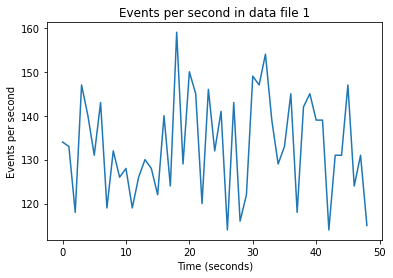

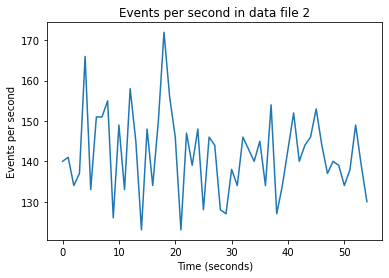

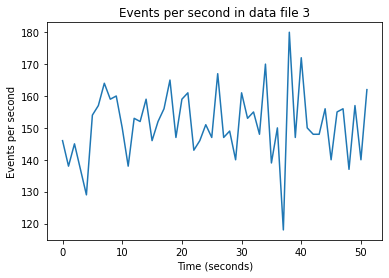

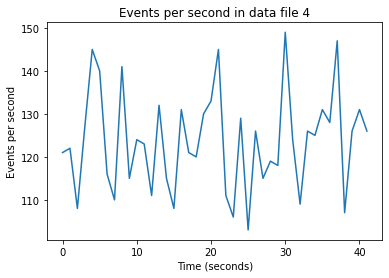

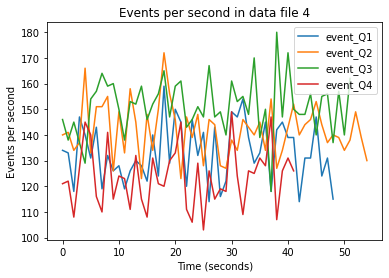

In [13]:
def plot_events_per_second(data, i):
    event_counts, bin_edges = np.histogram(data, bins=np.arange(0, np.max(data)+1))

    # calculate the number of events per millisecond
    events_per_second = event_counts

    # create a time axis in seconds
    time_axis = np.arange(0, len(events_per_second))

    # plot the events per second as a function of time
    plt.plot(time_axis, events_per_second, label='event_Q'+str(i))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Events per second')
    plt.title('Events per second in data file '+str(i))


def combinedPlot(data1,data2,data3,data4):
    plot_events_per_second(PosDataPoints1,1)
    plot_events_per_second(PosDataPoints2,2)
    plot_events_per_second(PosDataPoints3,3)
    plot_events_per_second(PosDataPoints4,4)
    plt.legend()
    plt.show()
#--------------------------------------------------------------------------------------#
plot_events_per_second(PosDataPoints1,1)
plt.show()
plot_events_per_second(PosDataPoints2,2)
plt.show()
plot_events_per_second(PosDataPoints3,3)
plt.show()
plot_events_per_second(PosDataPoints4,4)
plt.show()

# show all plots

combinedPlot(PosDataPoints1,PosDataPoints2,PosDataPoints3,PosDataPoints4)

Give your insights on what you observe in the various plots. Regarding frequency of events in various files as well as the total duration each file is covering.

#your code here
the highest frequency with wich an event has occured is in event q3
Further it can be observed that event Q2 lasts  the longest(i.e it starts the earliest at t=0 seconds and ends at the end)
Further it can be seen that red has the shortest event duration as it ends around 40s.

Now for the final part of this question. We can see that the event frequency varies with time. Count how many bins are there, where atleast 2 of the files have more than 140 events in that bin, simultaneously.

In [17]:
# calculate the number of events per second for each file
event_counts1, bin_edges = np.histogram(PosDataPoints1, bins=np.arange(0, np.max(PosDataPoints1)+1))
event_counts2, bin_edges = np.histogram(PosDataPoints2, bins=np.arange(0, np.max(PosDataPoints2)+1))
event_counts3, bin_edges = np.histogram(PosDataPoints3, bins=np.arange(0, np.max(PosDataPoints3)+1))
event_counts4, bin_edges = np.histogram(PosDataPoints4, bins=np.arange(0, np.max(PosDataPoints4)+1))

# find the bins where at least 2 of the files have more than 140 events
bin_counts = np.zeros(len(bin_edges) - 1)
for i in range(len(bin_counts)):
    freqs = [event_counts1[i], event_counts2[i], event_counts3[i], event_counts4[i]]
    if np.sum(np.array(freqs) > 140) >= 2:
        bin_counts[i] = 1

# count the number of bins where this condition is satisfied
num_bins = np.sum(bin_counts)
print(f"Number of common bins with at least 2 files having more than 140 events: {num_bins}")

# print the bins where this condition is satisfied
bins = np.where(bin_counts == 1)[0]


Number of common bins with at least 2 files having more than 140 events: 29.0


## Bonus

Let us do this more generally Generate a table with the threshold along one axis and the number of files along the other axis. Fill the table with counts of bins where atleast num_files have more than threshold events in that bin. In the previous part, num_files was 2 and num_bins was 140. Do this for num_files in [1,2,3,4]. num_bins in [130,135,140,145,150,155,160]. Print the table.

In [22]:
import numpy as np

# define the list of num_files and num_bins
num_files_list = [1, 2, 3, 4]
num_bins_list = [130, 135, 140, 145, 150, 155, 160]

# create an empty table with the given shape
table = np.zeros((len(num_files_list), len(num_bins_list)))

# loop over all combinations of num_files and num_bins
for i, num_files in enumerate(num_files_list):
    for j, num_bins in enumerate(num_bins_list):
        
        # calculate the number of events per second for each file
        event_counts1, bin_edges = np.histogram(PosDataPoints1, bins=np.arange(0, np.max(PosDataPoints1)+1))
        event_counts2, bin_edges = np.histogram(PosDataPoints2, bins=np.arange(0, np.max(PosDataPoints2)+1))
        event_counts3, bin_edges = np.histogram(PosDataPoints3, bins=np.arange(0, np.max(PosDataPoints3)+1))
        event_counts4, bin_edges = np.histogram(PosDataPoints4, bins=np.arange(0, np.max(PosDataPoints4)+1))
        
        # find the bins where at least num_files of the files have more than num_bins events
        bin_counts = np.zeros(len(bin_edges) - 1)
        for k in range(len(bin_counts)):
            freqs = [event_counts1[k], event_counts2[k], event_counts3[k], event_counts4[k]]
            if np.sum(np.array(freqs) > num_bins) >= num_files:
                bin_counts[k] = 1
                
        # count the number of bins where this condition is satisfied
        table[i,j] = np.sum(bin_counts)
        
# print the table
print("Threshold\tFiles\n\t\t130\t135\t140\t145\t150\t155\t160")
for i, num_files in enumerate(num_files_list):
    row = f"{num_files}\t\t"
    for j, num_bins in enumerate(num_bins_list):
        row += f"{table[i,j]}\t"
    print(row)


Threshold	Files
		130	135	140	145	150	155	160
1		42.0	42.0	40.0	37.0	25.0	17.0	9.0	
2		38.0	36.0	29.0	18.0	6.0	1.0	1.0	
3		24.0	14.0	8.0	4.0	1.0	1.0	0.0	
4		7.0	1.0	0.0	0.0	0.0	0.0	0.0	
